In [1]:
import pandas as pd
import numpy as np 
from hazm import *
import pandas as pd
from pandas import read_excel
import os,fnmatch,codecs
import re
import glob
import keras#     i am a 
from keras.preprocessing.sequence import pad_sequences# 1=30 2= 30
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from pandas import read_excel
import re
import sklearn.metrics as sklm
from keras import backend as K

Using TensorFlow backend.


In [2]:
my_sheet_name = 'sitedata' 
bandar = read_excel("bandar.xlsx", sheet_name = my_sheet_name)

In [3]:
bandar.head(2)

,Date/Time,Outside Dry-Bulb Temperature,Outside Dew-Point Temperature,Direct Normal Solar,Diffuse Horizontal Solar,Wind Speed,Wind Direction,Atmospheric Pressure,Solar Altitude,Solar Azimuth,Relative Humidity,Sky Cover,month,day,hour,working,Cooling (Electricity)
0,NaT,°C,°C,kW,kW,m/s,°,Pa,°,°,%,percent,month,day,hour,working,kW
1,2002-01-01 01:00:00,20.25,17.8,0,0,0.1,142.5,101400,-70.0182,82.7945,69.3648,40,1,4,1,0,0


In [4]:
bandar = bandar[bandar.month != 'month']
bandar.head(2)

,Date/Time,Outside Dry-Bulb Temperature,Outside Dew-Point Temperature,Direct Normal Solar,Diffuse Horizontal Solar,Wind Speed,Wind Direction,Atmospheric Pressure,Solar Altitude,Solar Azimuth,Relative Humidity,Sky Cover,month,day,hour,working,Cooling (Electricity)
1,2002-01-01 01:00:00,20.25,17.8,0,0,0.1,142.5,101400,-70.0182,82.7945,69.3648,40,1,4,1,0,0
2,2002-01-01 02:00:00,19.325,17.275,0,0,0,0,101400,-56.7025,91.2331,69.6227,60,1,4,2,0,0


In [5]:
bandar.keys()

Index(['Date/Time', 'Outside Dry-Bulb Temperature',
       'Outside Dew-Point Temperature', 'Direct Normal Solar',
       'Diffuse Horizontal Solar', 'Wind Speed', 'Wind Direction',
       'Atmospheric Pressure', 'Solar Altitude', 'Solar Azimuth',
       'Relative Humidity', 'Sky Cover', 'month', 'day', 'hour', 'working',
       'Cooling (Electricity)'],
      dtype='object')

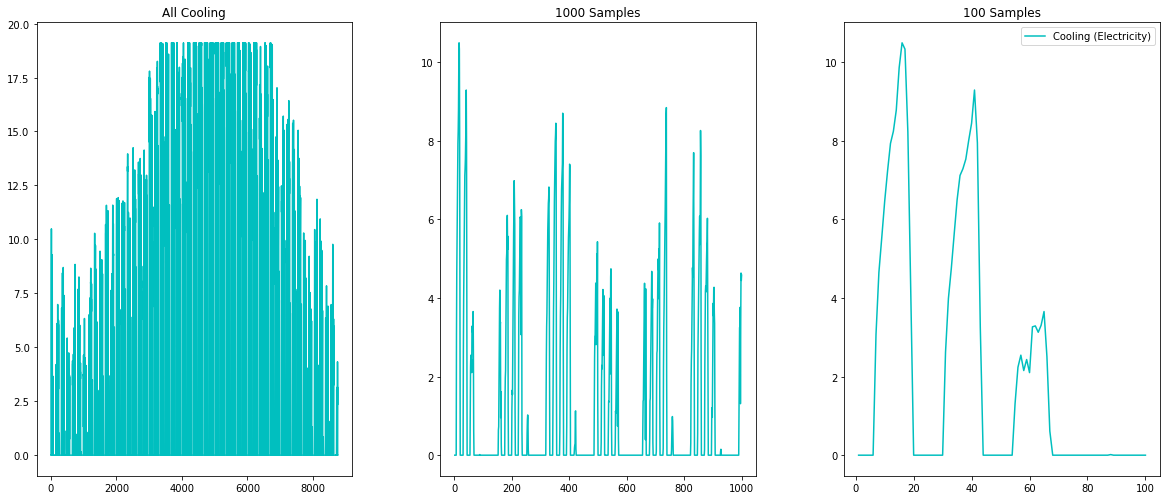

In [6]:
f, ax = plt.subplots(figsize=(20, 15))
plt.subplot(1, 3, 1)
ax=plt.plot(bandar['Cooling (Electricity)'],'c')
plt.title('All Cooling')
plt.subplot(1, 3, 2)
ax=plt.plot(bandar['Cooling (Electricity)'][0:1000],'c')
plt.title('1000 Samples')
plt.subplot(1, 3, 3)
ax=plt.plot(bandar['Cooling (Electricity)'][0:100],'c')
plt.title('100 Samples')
plt.legend()
plt.subplots_adjust(top=0.80, bottom=0.38, left=0.12, right=0.90, hspace=0.37, wspace=0.28)

plt.show()

In [7]:
col=[ 'Outside Dry-Bulb Temperature',
       'Outside Dew-Point Temperature', 'Direct Normal Solar',
       'Diffuse Horizontal Solar', 'Wind Speed', 'Wind Direction',
       'Atmospheric Pressure', 'Solar Altitude', 'Solar Azimuth',
       'Relative Humidity', 'Sky Cover', 'month', 'day', 'hour', 'working']

train_x,test_x, train_y,test_y = train_test_split(bandar[col], bandar['Cooling (Electricity)'], test_size=0.20, random_state=0)
print("Training instances   {}, Training features   {}".format(train_x.shape[0], train_x.shape[1]))
print("Testing instances    {}, Testing features    {}".format(test_x.shape[0], test_x.shape[1]))

Training instances   7008, Training features   15
Testing instances    1752, Testing features    15


# Models

Train R2: 0.602749096732785
Train MSE: 16.186453844846522
Test R2: 0.6037734793103635
Test MSE: 16.52053996056755


No handles with labels found to put in legend.


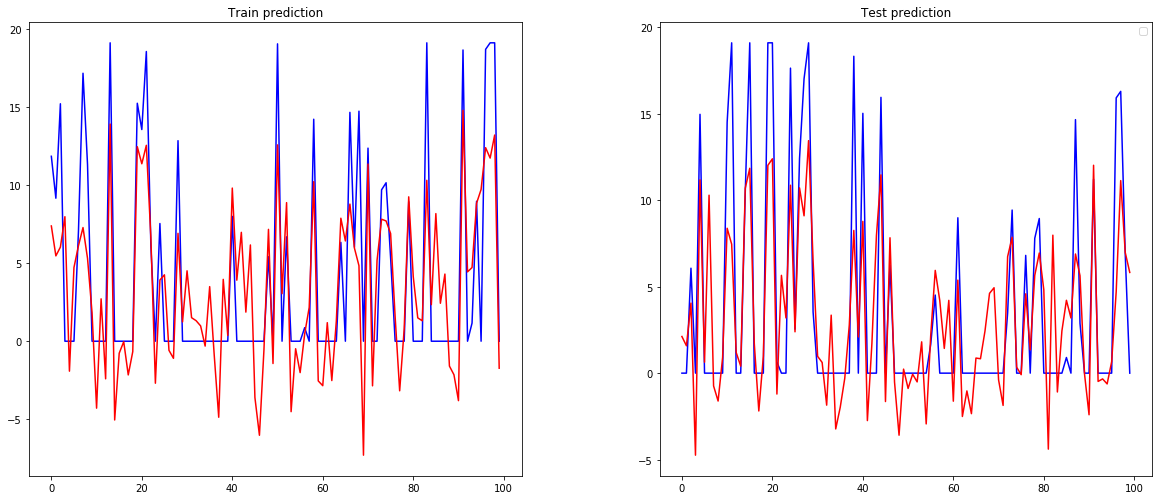

In [40]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
model_ridge = RidgeCV(cv=10)
model_ridge.fit(train_x, train_y)
train_y=np.array(train_y)
y_train_predict_ri = model_ridge.predict(train_x)


MSE_ri_tr=mean_squared_error(train_y, y_train_predict_ri)
r2_score_ri_tr=r2_score(train_y, y_train_predict_ri)
print("Train R2:",r2_score_ri_tr)
print("Train MSE:",MSE_ri_tr)
test_y=np.array(test_y)
y_test_predict_ri = model_ridge.predict(test_x)
MSE_ri_te=mean_squared_error(test_y, y_test_predict_ri)
r2_score_ri_te=r2_score(test_y, y_test_predict_ri)
print("Test R2:",r2_score_ri_te)
print("Test MSE:",MSE_ri_te)


f, ax = plt.subplots(figsize=(20, 15))
plt.subplot(1, 2, 1)
ax=plt.plot(train_y[0:100],'b-')
ax=plt.plot(y_train_predict_ri[0:100],'r-')
plt.title('Train prediction')
plt.subplot(1, 2, 2)
ax=plt.plot(test_y[0:100],'b-')
ax=plt.plot(y_test_predict_ri[0:100],'r-')
plt.title('Test prediction')
plt.legend()
plt.subplots_adjust(top=0.80, bottom=0.38, left=0.12, right=0.90, hspace=0.37, wspace=0.28)
plt.savefig('SLFF_.png')
plt.show()

No handles with labels found to put in legend.


Train R2: 0.9815910533595452
Train MSE: 0.7500941160290518
Test R2: 0.9726184105991013
Test MSE: 1.1416667443008728


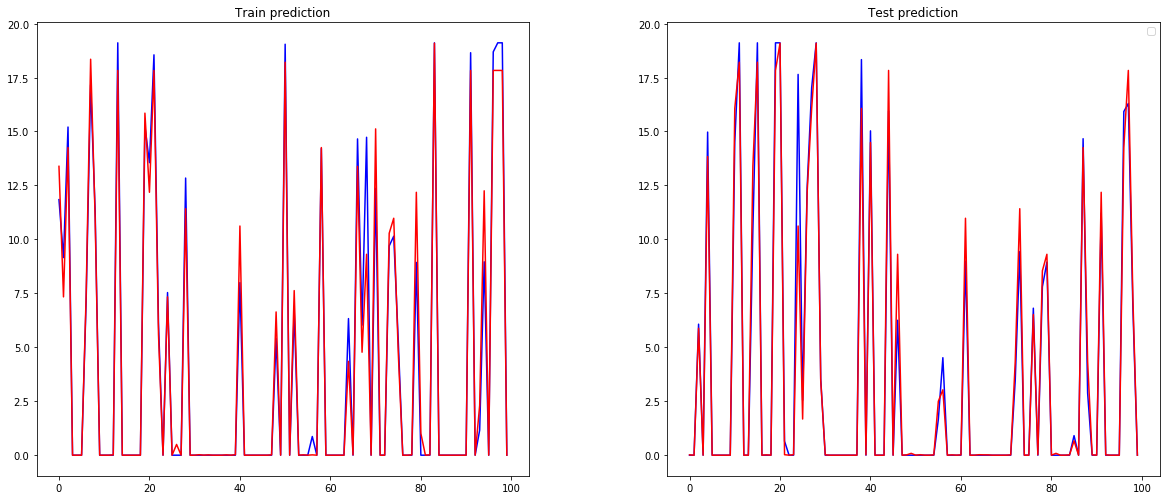

In [42]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(min_samples_leaf=7,
                               max_depth=8)
model_dt.fit(train_x, train_y)
train_y=np.array(train_y)
 
y_train_predict_dt = model_dt.predict(train_x)


MSE_df_tr=mean_squared_error(train_y, y_train_predict_dt)
r2_score_df_tr=r2_score(train_y, y_train_predict_dt)
print("Train R2:",r2_score_df_tr)
print("Train MSE:",MSE_df_tr)
test_y=np.array(test_y)
y_test_predict_dt = model_dt.predict(test_x)
MSE_df_te=mean_squared_error(test_y, y_test_predict_dt)
r2_score_df_te=r2_score(test_y, y_test_predict_dt)
print("Test R2:",r2_score_df_te)
print("Test MSE:",MSE_df_te)


f, ax = plt.subplots(figsize=(20, 15))
plt.subplot(1, 2, 1)
ax=plt.plot(train_y[0:100],'b-')
ax=plt.plot(y_train_predict_dt[0:100],'r-')
plt.title('Train prediction')
plt.subplot(1, 2, 2)
ax=plt.plot(test_y[0:100],'b-')
ax=plt.plot(y_test_predict_dt[0:100],'r-')
plt.title('Test prediction')
plt.legend()
plt.subplots_adjust(top=0.80, bottom=0.38, left=0.12, right=0.90, hspace=0.37, wspace=0.28)
plt.savefig('SLFF_.png')
plt.show()

Train MSE: 12.593396294766494
Train R2: 0.6909305706332477
Train R2: 0.5255471353605994
Test MSE: 19.782162728629228


No handles with labels found to put in legend.


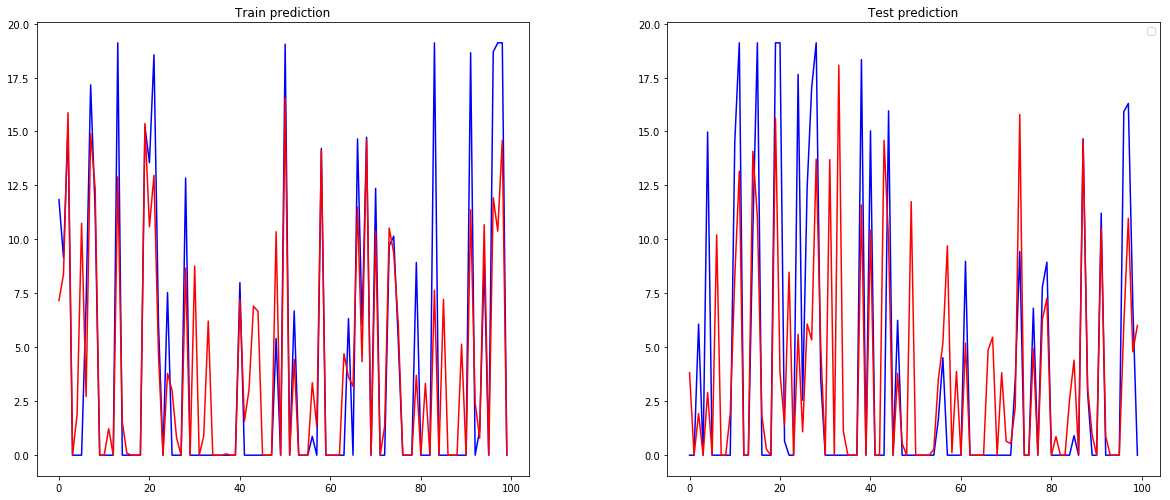

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
knn = KNeighborsRegressor()
knn.fit(train_x, train_y)
train_y=np.array(train_y)
 
y_train_predict_knn = knn.predict(train_x)

 
MSE_knn_tr=mean_squared_error(train_y, y_train_predict_knn)
print("Train MSE:",MSE_knn_tr)
r2_score_KNN_tr=r2_score(train_y, y_train_predict_knn)
print("Train R2:",r2_score_KNN_tr)
test_y=np.array(test_y)
y_test_predict_knn = knn.predict(test_x)
MSE_knn_te=mean_squared_error(test_y, y_test_predict_knn)
r2_score_KNN_te=r2_score(test_y, y_test_predict_knn)
print("Train R2:",r2_score_KNN_te)
print("Test MSE:",MSE_knn_te)


f, ax = plt.subplots(figsize=(20, 15))
plt.subplot(1, 2, 1)
ax=plt.plot(train_y[0:100],'b-')
ax=plt.plot(y_train_predict_knn[0:100],'r-')
plt.title('Train prediction')
plt.subplot(1, 2, 2)
ax=plt.plot(test_y[0:100],'b-')
ax=plt.plot(y_test_predict_knn[0:100],'r-')
plt.title('Test prediction')
plt.legend()
plt.subplots_adjust(top=0.80, bottom=0.38, left=0.12, right=0.90, hspace=0.37, wspace=0.28)
plt.savefig('SLFF_.png')
plt.show()

Train MSE: 45.70036779086066
Train R2: -0.12158676375822797


No handles with labels found to put in legend.


Test MSE: 54.57645807580031
Test R2: -0.3089548009056282


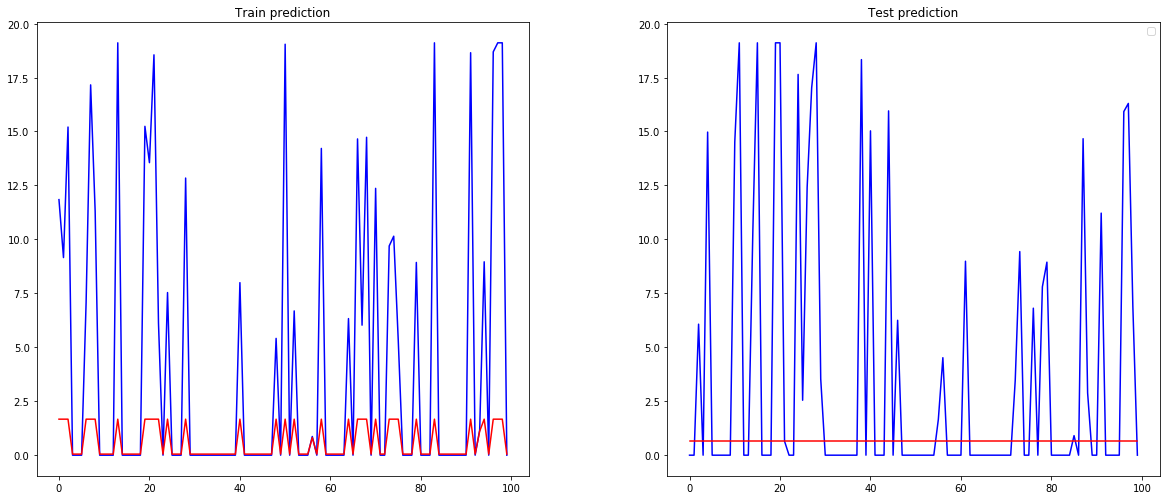

In [46]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
svr= SVR(kernel='rbf',gamma=10,C=1.0, epsilon=0.05)
svr.fit(train_x, train_y)
train_y=np.array(train_y)
y_train_predict_svr = svr.predict(train_x)
MSE_svr_tr=mean_squared_error(train_y, y_train_predict_svr)
print("Train MSE:",MSE_svr_tr)
r2_score_SVR_tr=r2_score(train_y, y_train_predict_svr)
print("Train R2:",r2_score_SVR_tr)
test_y=np.array(test_y)
y_test_predict_svr = svr.predict(test_x)
MSE_svr_te=mean_squared_error(test_y, y_test_predict_svr)
print("Test MSE:",MSE_svr_te)
r2_score_SVR_te=r2_score(test_y, y_test_predict_svr)
print("Test R2:",r2_score_SVR_te)
f, ax = plt.subplots(figsize=(20, 15))
plt.subplot(1, 2, 1)
ax=plt.plot(train_y[0:100],'b-')
ax=plt.plot(y_train_predict_svr[0:100],'r-')
plt.title('Train prediction')
plt.subplot(1, 2, 2)
ax=plt.plot(test_y[0:100],'b-')
ax=plt.plot(y_test_predict_svr[0:100],'r-')
plt.title('Test prediction')
plt.legend()
plt.subplots_adjust(top=0.80, bottom=0.38, left=0.12, right=0.90, hspace=0.37, wspace=0.28)
plt.savefig('SLFF_.png')
plt.show()

Train MSE: 0.21296350514847495
Train R2: 0.9947734108042374
Test MSE: 0.48759801080995663
Test R2: 0.9883055115765248


No handles with labels found to put in legend.


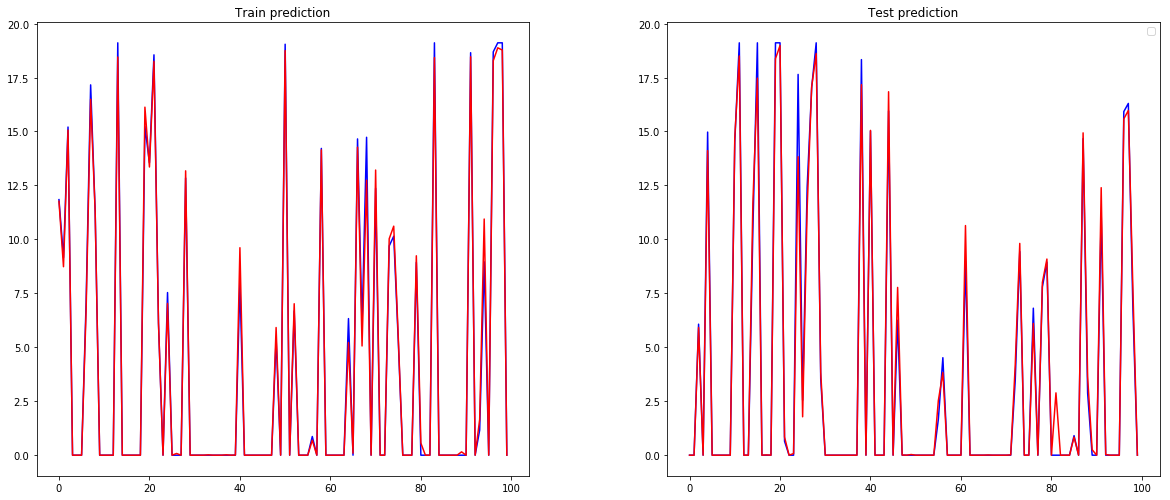

In [47]:
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor(n_estimators=100,
                                 min_samples_leaf=3,
                                 max_features='auto',
                                 max_depth=10)
model_RF.fit(train_x, train_y)
train_y=np.array(train_y)
y_train_predict_RF = model_RF.predict(train_x)
MSE_RF_tr=mean_squared_error(train_y, y_train_predict_RF)
print("Train MSE:",MSE_RF_tr)
r2_score_RF_tr=r2_score(train_y, y_train_predict_RF)
print("Train R2:",r2_score_RF_tr)
test_y=np.array(test_y)
y_test_predict_RF = model_RF.predict(test_x)
MSE_RF_te=mean_squared_error(test_y, y_test_predict_RF)
print("Test MSE:",MSE_RF_te)
r2_score_RF_te=r2_score(test_y, y_test_predict_RF)
print("Test R2:",r2_score_RF_te)
f, ax = plt.subplots(figsize=(20, 15))
plt.subplot(1, 2, 1)
ax=plt.plot(train_y[0:100],'b-')
ax=plt.plot(y_train_predict_RF[0:100],'r-')
plt.title('Train prediction')
plt.subplot(1, 2, 2)
ax=plt.plot(test_y[0:100],'b-')
ax=plt.plot(y_test_predict_RF[0:100],'r-')
plt.title('Test prediction')
plt.legend()
plt.subplots_adjust(top=0.80, bottom=0.38, left=0.12, right=0.90, hspace=0.37, wspace=0.28)
plt.savefig('SLFF_.png')
plt.show()

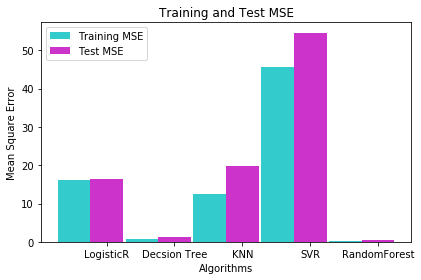

In [13]:
import numpy as np
import matplotlib.pyplot as plt
n_groups = 5
Training_accuracy =(MSE_ri_tr,MSE_df_tr,MSE_knn_tr,MSE_svr_tr,MSE_RF_tr)
Test_accuracy = (MSE_ri_te,MSE_df_te,MSE_knn_te,MSE_svr_te,MSE_RF_te)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.48
opacity = 0.8
 
rects1 = plt.bar(index, Training_accuracy, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Training MSE')
 
rects2 = plt.bar(index + bar_width, Test_accuracy, bar_width,
                 alpha=opacity,
                 color='m',
                 label='Test MSE')
 
plt.xlabel('Algorithms')
plt.ylabel('Mean Square Error')
plt.title('Training and Test MSE')
plt.xticks(index + bar_width, ('LogisticR', 'Decsion Tree', 'KNN', 'SVR','RandomForest'))
plt.legend()

plt.tight_layout()
plt.show()

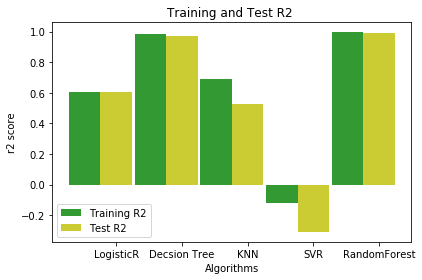

In [53]:
r2_score_RF_tr
import numpy as np
import matplotlib.pyplot as plt
n_groups = 5
Training_accuracy =(r2_score_ri_tr,r2_score_df_tr,r2_score_KNN_tr,r2_score_SVR_tr,r2_score_RF_tr)
Test_accuracy = (r2_score_ri_te,r2_score_df_te,r2_score_KNN_te,r2_score_SVR_te,r2_score_RF_te)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.48
opacity = 0.8
 
rects1 = plt.bar(index, Training_accuracy, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Training R2')
 
rects2 = plt.bar(index + bar_width, Test_accuracy, bar_width,
                 alpha=opacity,
                 color='y',
                 label='Test R2')
 
plt.xlabel('Algorithms')
plt.ylabel('r2 score')
plt.title('Training and Test R2 ')
plt.xticks(index + bar_width, ('LogisticR', 'Decsion Tree', 'KNN', 'SVR','RandomForest'))
plt.legend()

plt.tight_layout()
plt.show()


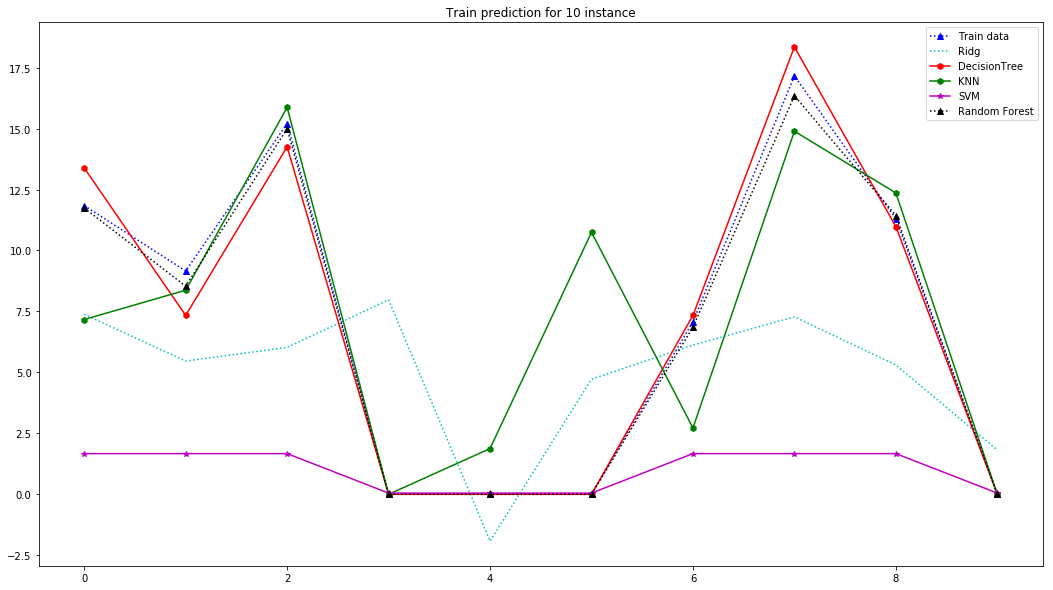

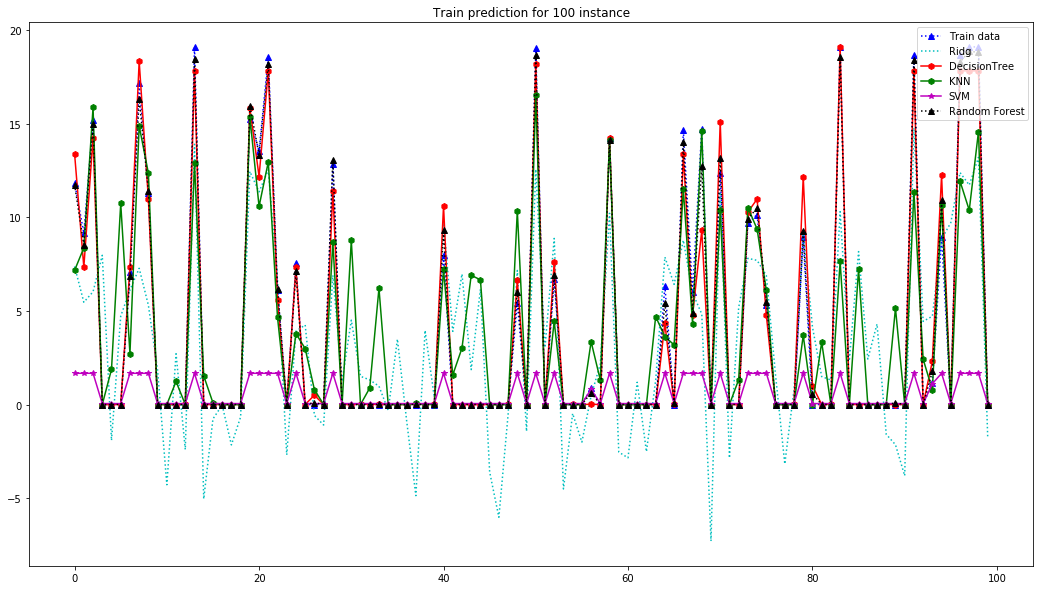

In [14]:
fig=plt.figure(figsize=(18,10))
plt.plot(train_y[0:10],'b^:',label='Train data')
plt.plot(y_train_predict_ri[0:10],'c:',label='Ridg')
plt.plot(y_train_predict_dt[0:10],'r-h',label='DecisionTree')
plt.plot(y_train_predict_knn[0:10],'g-h',label='KNN')
plt.plot(y_train_predict_svr[0:10],'m-*',label='SVM')
plt.plot(y_train_predict_RF[0:10],'k^:',label='Random Forest')
plt.title("Train prediction for 10 instance")
plt.legend(loc='upper right')
plt.show()
fig=plt.figure(figsize=(18,10))
plt.plot(train_y[0:100],'b^:',label='Train data')
plt.plot(y_train_predict_ri[0:100],'c:',label='Ridg')
plt.plot(y_train_predict_dt[0:100],'r-h',label='DecisionTree')
plt.plot(y_train_predict_knn[0:100],'g-h',label='KNN')
plt.plot(y_train_predict_svr[0:100],'m-*',label='SVM')
plt.plot(y_train_predict_RF[0:100],'k^:',label='Random Forest')
plt.title("Train prediction for 100 instance")
plt.legend(loc='upper right')
plt.show()

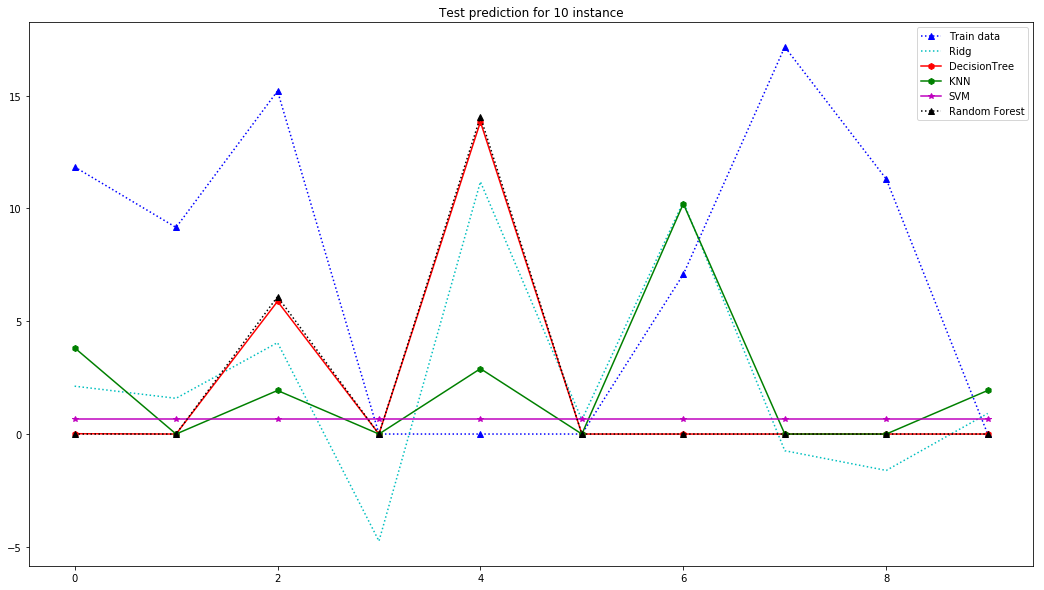

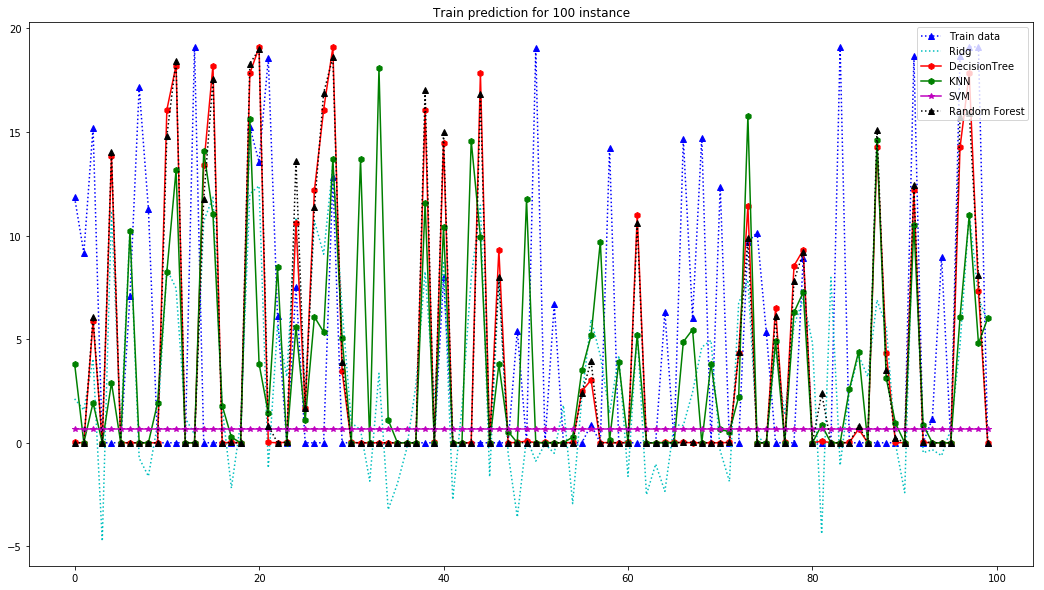

In [15]:
fig=plt.figure(figsize=(18,10))
plt.plot(train_y[0:10],'b^:',label='Train data')
plt.plot(y_test_predict_ri[0:10],'c:',label='Ridg')
plt.plot(y_test_predict_dt[0:10],'r-h',label='DecisionTree')
plt.plot(y_test_predict_knn[0:10],'g-h',label='KNN')
plt.plot(y_test_predict_svr[0:10],'m-*',label='SVM')
plt.plot(y_test_predict_RF[0:10],'k^:',label='Random Forest')
plt.title("Test prediction for 10 instance")
plt.legend(loc='upper right')
plt.show()
fig=plt.figure(figsize=(18,10))
plt.plot(train_y[0:100],'b^:',label='Train data')
plt.plot(y_test_predict_ri[0:100],'c:',label='Ridg')
plt.plot(y_test_predict_dt[0:100],'r-h',label='DecisionTree')
plt.plot(y_test_predict_knn[0:100],'g-h',label='KNN')
plt.plot(y_test_predict_svr[0:100],'m-*',label='SVM')
plt.plot(y_test_predict_RF[0:100],'k^:',label='Random Forest')
plt.title("Train prediction for 100 instance")
plt.legend(loc='upper right')
plt.show()

In [32]:
Training_accuracy =[MSE_ri_tr,MSE_df_tr,MSE_knn_tr,MSE_svr_tr,MSE_RF_tr]
Test_accuracy = [MSE_ri_te,MSE_df_te,MSE_knn_te,MSE_svr_te,MSE_RF_te]
def maxminposition(A):
    minposition=A.index(min(A))
    #maxposition=A.index(max(A))
    return minposition#,maxposition
minindexintraining=maxminposition(Training_accuracy)
minindexintesting=maxminposition(Training_accuracy)

if minindexintraining ==0:
    print("best model is RidgeCV")
    print('*'*50)
    print("MSE Value for traing data is:",Training_accuracy[minindex])
    print("MSE Value for test data is:",Test_accuracy[minindex])
    print('*'*50)
elif minindexintraining ==1:
    print("best model is Decision Tree")
    print('*'*50)
    print("MSE Value for traing data is:",Training_accuracy[minindex])
    print("MSE Value for test data is:",Test_accuracy[minindex])
    print('*'*50)
elif minindexintraining ==2:
    print("best model is K Nearest Neighor")
    print('*'*50)
    print("MSE Value for traing data is:",Training_accuracy[minindex])
    print("MSE Value for test data is:",Test_accuracy[minindex])
    print('*'*50)
elif minindexintraining ==3:
    print("best model is Support Vector Regression")
    print('*'*50)
    print("MSE Value for traing data is:",Training_accuracy[minindex])
    print("MSE Value for test data is:",Test_accuracy[minindex])
    print('*'*50)
elif minindexintraining ==4:
    print("best model is Random Forest")
    print('*'*50)
    print("MSE Value for traing data is:",Training_accuracy[minindex])
    print("MSE Value for test data is:",Test_accuracy[minindex])
    print('*'*50)

best model is Random Forest
**************************************************
MSE Value for traing data is: 0.21633326067654202
MSE Value for test data is: 0.49050278698313016
**************************************************


# pso optimization

In [28]:
! pip install psopy

In [35]:
import numpy as np
from psopy import init_feasible
from psopy import minimize
from scipy.optimize import rosen
x0 = np.random.uniform(0, 2, (1000, 5))
res = minimize(rosen, x0, options={'stable_iter': 50})
res.x
#https://pypi.org/project/psopy/

array([0.99999967, 0.99999928, 0.99999801, 0.99999613, 0.99999131])